In [1]:
!pip install torchaudio

import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt

In [2]:
file_name = './test/test_00001.wav'
x, sr = torchaudio.load(file_name)
print(x.shape, sr)

torch.Size([1, 16000]) 16000


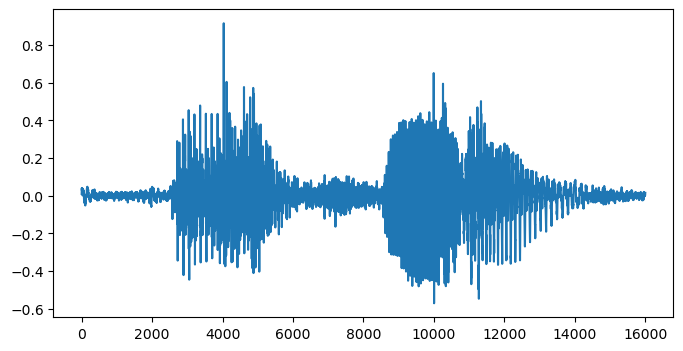

In [3]:
_, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x[0, :])
plt.show()

In [4]:
spectrogram = nn.Sequential(
    AT.Spectrogram(n_fft=512, 
                   win_length=400, 
                   hop_length=160),
    AT.AmplitudeToDB()
)

mel_spectrogram = nn.Sequential(
    AT.MelSpectrogram(sample_rate=sr, 
                      n_fft=512, 
                      win_length=400,
                      hop_length=160,
                      n_mels=80),
    AT.AmplitudeToDB()
)

In [5]:
spec = spectrogram(x)
mel = mel_spectrogram(x)
print(spec.shape, mel.shape)

torch.Size([1, 257, 101]) torch.Size([1, 80, 101])


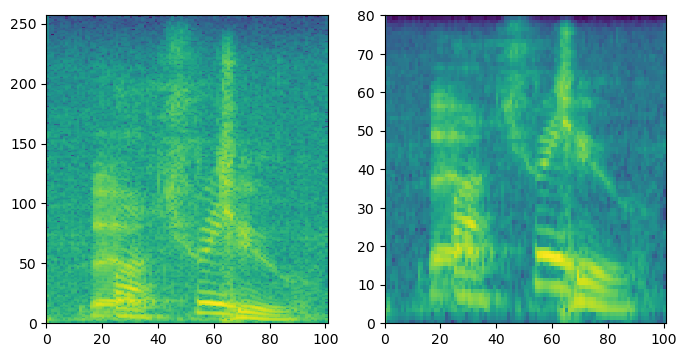

In [6]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].pcolor(spec[0])
ax[1].pcolor(mel[0])
plt.show()